In [168]:
# Imports das Bibliotecas

# Bibliotecas necessárias
# Manipulação de dados
import pandas as pd
import numpy as np
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string
# Redes Neurais
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
# Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Avaliação
from sklearn.metrics import classification_report, confusion_matrix

In [124]:
df = pd.read_csv("./datasets/updated_file.csv")

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1220 non-null   object
 1   Original_Text  1209 non-null   object
 2   Color          1220 non-null   object
 3   Label          1220 non-null   object
dtypes: object(4)
memory usage: 38.2+ KB


In [126]:
df = df.dropna(subset=["Original_Text"])
df = df.drop(columns=["Name"], axis=1)

# Limpeza dos Dados


In [127]:
nltk.download('stopwords')
stemmer = PorterStemmer() 

[nltk_data] Downloading package stopwords to /home/aluno/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [128]:
!pip3 install spacy
!pip3 install unidecode

!python3 -m spacy download pt_core_news_sm

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 19.5 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [129]:
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from unidecode import unidecode

# Download Portuguese stopwords
stop_words = set(stopwords.words('portuguese'))

# Load the spaCy model for Portuguese
nlp = spacy.load("pt_core_news_sm")

def preprocess_text(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Retrieve the base form (lemma) of each word and remove punctuation
    lemmatized_words = [token.lemma_ for token in doc if token.text not in string.punctuation]

    # Remove stopwords and newline characters after lemmatization
    filtered_words = [word for word in lemmatized_words if word.lower() not in stop_words and word != '\n']

    # Remove accents from words
    cleaned_words = [unidecode(word) for word in filtered_words]

    # Reconstruct the text without stopwords, punctuation, accents, and newline characters
    preprocessed_text = ' '.join(cleaned_words)

    return preprocessed_text

# Example usage
text = "Estou correndo e pulando, mas com stopwords e \n que precisamos remover."
processed_text = preprocess_text(text)
print(processed_text)

correndo pular stopwords 
  precisar remover


In [130]:
df["Original_Text"] = df["Original_Text"].apply(preprocess_text)


In [131]:
# df['label'] = df.label.map({'Detractor':0, 'Promoter':1, 'Passive':2})

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

colunas_categoricas = ['Color']

one_hot_enc = make_column_transformer((OneHotEncoder(handle_unknown = 'ignore'),colunas_categoricas),remainder='passthrough')


df = one_hot_enc.fit_transform(df)
df = pd.DataFrame(df, columns=one_hot_enc.get_feature_names_out())
df

,onehotencoder__Color_Branca,onehotencoder__Color_Negra,onehotencoder__Color_Parda,remainder__Original_Text,remainder__Label
0,0.0,1.0,0.0,EXCELENTISSIMO DOUTOR JUIZ DIREITO de o 3a VAR...,Aberto
1,1.0,0.0,0.0,EXCELENTISSIMO SR DR JUIZ DIREITO VARAS de o F...,Aberto
2,1.0,0.0,0.0,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO de o...,Aberto
3,1.0,0.0,0.0,EXMO SR DR JUIZ DIREITO de o 2a VARA de o FAMI...,Fechado
4,0.0,1.0,0.0,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO de o...,Aberto
...,...,...,...,...,...
1204,1.0,0.0,0.0,jUIZO 5o JUIZADO ESPECIAL CIVEL de o COMARCA R...,Aberto
1205,1.0,0.0,0.0,EXCELENTISSIMO SENHOR DESEMBARGADOR RELATOR de...,Aberto
1206,1.0,0.0,0.0,EXMO SR JUIZ FEDERAL JUIZADO ESPECIAL FEDERAL ...,Fechado
1207,0.0,0.0,1.0,EXCELENTISSIMO SENHOR DOUTOR JUIZ DIREITO JUIZ...,Aberto


In [132]:
def textPreprocessor(featureRecord):
    #Remove punctuations
    removePunctuation = [char for char in featureRecord if char not in string.punctuation]
    sentences =''.join(removePunctuation)

    #convert sentences to words
    words = sentences.split(" ")

    #normalize
    wordNormalized=[word.lower() for word in words]

    #remove stropwords
    finalWords=[word for word in wordNormalized if word not in stopwords.words("portuguese")]

    finalWords = [stemmer.stem(word) for word in finalWords]

    #joined = ' '.join(finalWords)

    return finalWords

In [133]:
txt = df.iloc[:,3]
label = df.iloc[:,0:3]

In [134]:
label

,onehotencoder__Color_Branca,onehotencoder__Color_Negra,onehotencoder__Color_Parda
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
1204,1.0,0.0,0.0
1205,1.0,0.0,0.0
1206,1.0,0.0,0.0
1207,0.0,0.0,1.0


In [135]:
#Create Bag Of Words 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#Initialize Count Vectorizer with our custom preprocessing function

wordVector = CountVectorizer(analyzer=textPreprocessor)

#Build Vocab
finalWordVocab = wordVector.fit(txt)

In [136]:
finalWordVocab.vocabulary_

{'excelentissimo': 28945,
 'doutor': 26379,
 'juiz': 35558,
 'direito': 25797,
 '3a': 11477,
 'vara': 52492,
 'civel': 21256,
 'comarca': 21736,
 'varginha': 52507,
 'mg': 38183,
 'processo': 44444,
 '00000000000000000000': 16,
 'nome': 39602,
 'advogado': 16087,
 'subscrev': 49732,
 'vir': 53029,
 'respeitosament': 46924,
 'presenca': 44111,
 'vossa': 53226,
 'excelencia': 28937,
 'dizer': 26120,
 'requerido': 46765,
 'negativar': 39270,
 'autor': 18656,
 'alegar': 16638,
 'credor': 23460,
 'part': 42314,
 'ter': 50592,
 'realizar': 45705,
 'negocio': 39288,
 'juridico': 35703,
 'bem': 19220,
 'exercitar': 29073,
 'sagrado': 47994,
 'acao': 15540,
 'adentrar': 15840,
 'present': 44122,
 'ond': 41366,
 'instar': 34165,
 'demonstrar': 24572,
 'legalidad': 36252,
 'negativacao': 39265,
 'sob': 49168,
 'pena': 42679,
 'fazer': 29766,
 'condenar': 22230,
 'proced': 44405,
 'baixa': 18948,
 'restritivo': 47067,
 'pagamento': 42040,
 'indenizacao': 33552,
 'titulo': 50904,
 'dano': 24016,
 '

In [137]:
#Create Bag Of Words

bagOfWords = finalWordVocab.transform(txt)

bagOfWords

<1209x53777 sparse matrix of type '<class 'numpy.int64'>'
	with 534606 stored elements in Compressed Sparse Row format>

In [138]:
#Apply TFIDF on Bag Of Words

#Calc All Values (TF and IDF)

tfIdfObject = TfidfTransformer().fit(bagOfWords)

#Transform data (Calc Weights)
finalFeature = tfIdfObject.transform(bagOfWords)

finalFeature

<1209x53777 sparse matrix of type '<class 'numpy.float64'>'
	with 534606 stored elements in Compressed Sparse Row format>

In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(finalFeature, label, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [158]:
X_train, X_test, X_valid  = X_train.toarray(), X_test.toarray(), X_valid.toarray()
y_train, y_valid = y_train.values, y_valid.values

In [160]:
X_train, X_valid, y_train, y_valid = X_train.astype('float32'), X_valid.astype('float32'), y_train.astype('float32'), y_valid.astype('float32')

In [192]:
import matplotlib.pyplot as plt 
import pandas as pd

def infos(model, history):
    _, accuracy = model.evaluate(X_valid, y_valid)
    
    from sklearn.metrics import confusion_matrix
    y_pred = model.predict(X_valid)
    
    macro = tf.keras.metrics.F1Score(average="macro", name='f1_score', dtype=None)
    
    micro = tf.keras.metrics.F1Score(average="micro", name='f1_score', dtype=None)
    
        
    macro.update_state(y_valid, y_pred)
    micro.update_state(y_valid, y_pred)
    print('Accuracy: %.2f' % (accuracy*100))

    print("macro = " + str((macro.result()).numpy()) + "\nmicro = " + str((micro.result()).numpy()))
        
    y_pred=np.argmax(y_pred, axis=1)
    y_valid1=np.argmax(y_valid, axis=1)
    cm = confusion_matrix(y_valid1, y_pred)
     
    sum = cm.sum()
 
    df_cm = pd.DataFrame(cm, index = ["Brancos", "Negros", "Pardos"], columns = ["Brancos", "Negros", "Pardos"])

    # Calculate the maximum value in the confusion matrix
    max_value = df_cm.values.max()

    # Set the maximum value for color mapping dynamically
    vmax_d = max_value + 1  # Add 1 to ensure the maximum value is included in the color scale

    
    res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=vmax_d,  cmap=plt.cm.Blues, fmt='g')
    plt.yticks([0.5,1.5,2.5], ["Brancos", "Negros", "Pardos"], va='center')
    plt.title('Matriz de Confusão')
    plt.show()
    
    pd.DataFrame(history.history).plot(
        figsize=(8, 5), grid=True, xlabel="Epoch", style=["r-", "b-", "r-.", "b-."], ylim=(0, 1.5)
    )
    plt.show()

In [316]:
from keras.initializers import glorot_uniform

def teste_model(flag): 

    n_neuronios_ocultos = 64
    iniciador_pesos = glorot_uniform(seed=42)
    
    tf.random.set_seed(42)
    model = tf.keras.Sequential()
    
    if flag == 1:
        model.add(tf.keras.Input(shape=X_train.shape[1:]))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="relu"))
        model.add(tf.keras.layers.Dropout(rate=0.2))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="relu"))
        model.add(tf.keras.layers.Dense(3, activation='sigmoid'))
    elif flag == 2:
        model.add(tf.keras.Input(shape=X_train.shape[1:]))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu", kernel_initializer=iniciador_pesos))
        model.add(tf.keras.layers.Dropout(rate=0.2))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu", kernel_initializer=iniciador_pesos))
        model.add(tf.keras.layers.Dense(3, activation='sigmoid'))
    elif flag == 3:
        model.add(tf.keras.Input(shape=X_train.shape[1:]))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="relu", kernel_regularizer=tf.keras.regularizers.l2()))
        model.add(tf.keras.layers.Dropout(rate=0.2))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="relu", kernel_regularizer=tf.keras.regularizers.l2()))
        model.add(tf.keras.layers.Dense(3, activation='softmax'))
    elif flag == 4:
        model.add(tf.keras.Input(shape=X_train.shape[1:]))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu", kernel_regularizer=tf.keras.regularizers.l2()))
        model.add(tf.keras.layers.Dropout(rate=0.2))
        model.add(tf.keras.layers.Dense(units=n_neuronios_ocultos, activation="selu", kernel_regularizer=tf.keras.regularizers.l2()))
        model.add(tf.keras.layers.Dense(3, activation='softmax'))

    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    model.compile(
        optimizer=optimizer,
        # Loss function to minimize
        loss="categorical_crossentropy",
        # loss=tf.keras.losses.CategoricalHinge(),
        # List of metrics to monitor
        metrics=["accuracy"]
    )
        
    model.build()
    model.summary()
    return model

In [317]:
model = teste_model(1) 
history = model.fit(X_train, y_train, epochs=64, batch_size=64, validation_data=(X_valid, y_valid))

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_33 (Ba  (None, 53777)             215108    
 tchNormalization)                                               
                                                                 
 dense_211 (Dense)           (None, 64)                3441792   
                                                                 
 dropout_48 (Dropout)        (None, 64)                0         
                                                                 
 dense_212 (Dense)           (None, 64)                4160      
                                                                 
 dense_213 (Dense)           (None, 3)                 195       
                                                                 
Total params: 3661255 (13.97 MB)
Trainable params: 3553701 (13.56 MB)
Non-trainable params: 107554 (420.13 KB)
________

7/7 [==============================] - 0s 4ms/step
Accuracy: 72.16
macro = 0.7216539
micro = 0.72164947


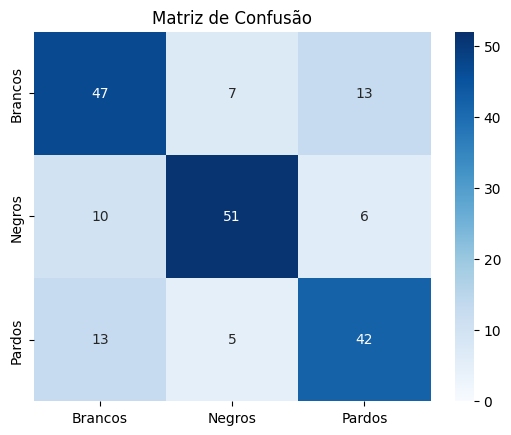

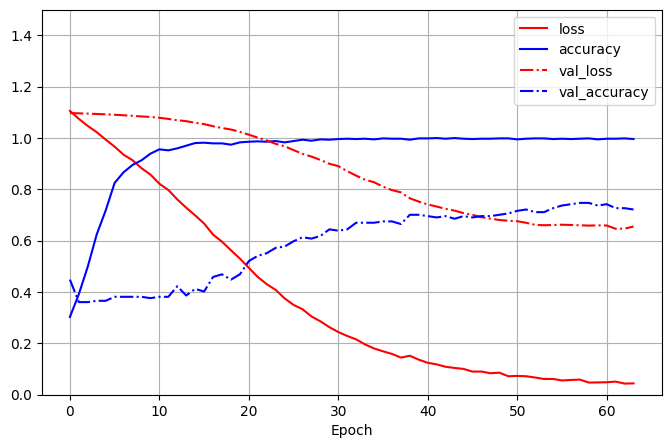

In [318]:
infos(model, history)

In [319]:
model = teste_model(2) 
history = model.fit(X_train, y_train, epochs=64, batch_size=64, validation_data=(X_valid, y_valid))

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_34 (Ba  (None, 53777)             215108    
 tchNormalization)                                               
                                                                 
 dense_214 (Dense)           (None, 64)                3441792   
                                                                 
 dropout_49 (Dropout)        (None, 64)                0         
                                                                 
 dense_215 (Dense)           (None, 64)                4160      
                                                                 
 dense_216 (Dense)           (None, 3)                 195       
                                                                 
Total params: 3661255 (13.97 MB)
Trainable params: 3553701 (13.56 MB)
Non-trainable params: 107554 (420.13 KB)
________

7/7 [==============================] - 0s 3ms/step
Accuracy: 71.13
macro = 0.7098004
micro = 0.7113402


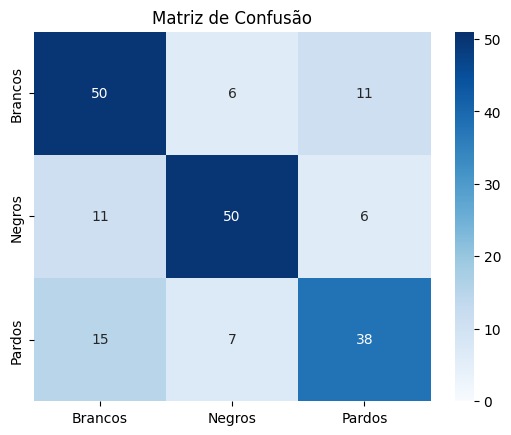

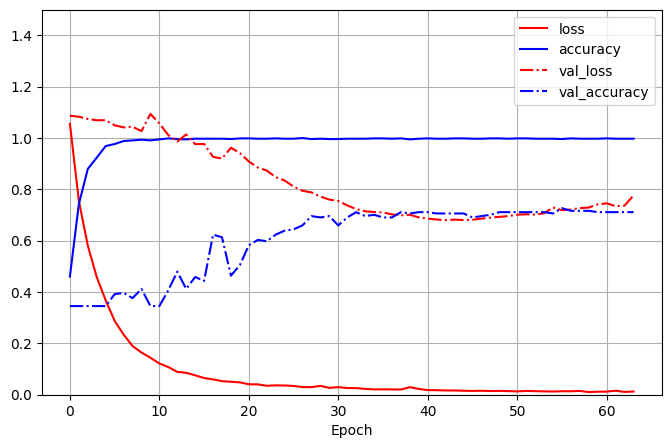

In [320]:
infos(model, history)

In [321]:
model = teste_model(3) 
history = model.fit(X_train, y_train, epochs=64, batch_size=64, validation_data=(X_valid, y_valid))

Model: "sequential_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_35 (Ba  (None, 53777)             215108    
 tchNormalization)                                               
                                                                 
 dense_217 (Dense)           (None, 64)                3441792   
                                                                 
 dropout_50 (Dropout)        (None, 64)                0         
                                                                 
 dense_218 (Dense)           (None, 64)                4160      
                                                                 
 dense_219 (Dense)           (None, 3)                 195       
                                                                 
Total params: 3661255 (13.97 MB)
Trainable params: 3553701 (13.56 MB)
Non-trainable params: 107554 (420.13 KB)
________

7/7 [==============================] - 0s 5ms/step
Accuracy: 70.62
macro = 0.703361
micro = 0.7061856


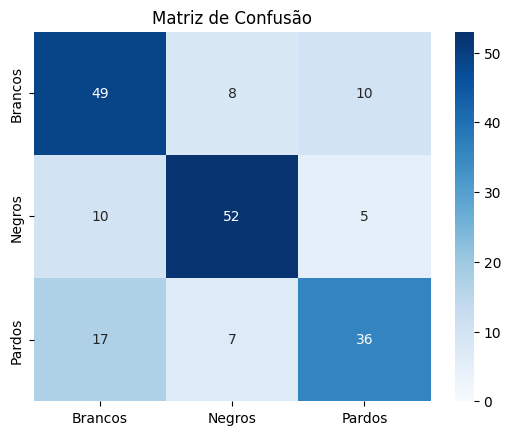

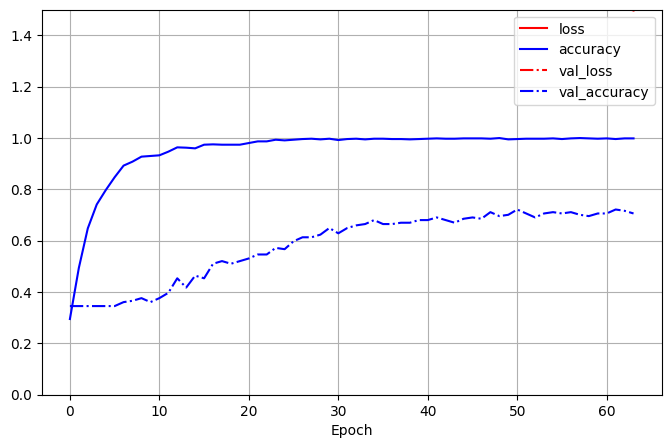

In [322]:
infos(model, history)

In [323]:
model = teste_model(4) 
history = model.fit(X_train, y_train, epochs=64, batch_size=64, validation_data=(X_valid, y_valid))

Model: "sequential_73"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_36 (Ba  (None, 53777)             215108    
 tchNormalization)                                               
                                                                 
 dense_220 (Dense)           (None, 64)                3441792   
                                                                 
 dropout_51 (Dropout)        (None, 64)                0         
                                                                 
 dense_221 (Dense)           (None, 64)                4160      
                                                                 
 dense_222 (Dense)           (None, 3)                 195       
                                                                 
Total params: 3661255 (13.97 MB)
Trainable params: 3553701 (13.56 MB)
Non-trainable params: 107554 (420.13 KB)
________

7/7 [==============================] - 0s 4ms/step
Accuracy: 69.07
macro = 0.6883981
micro = 0.69072163


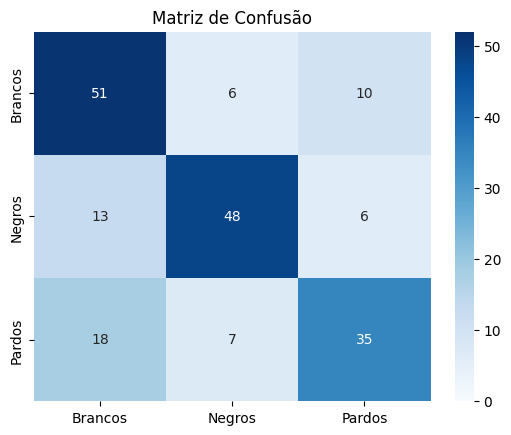

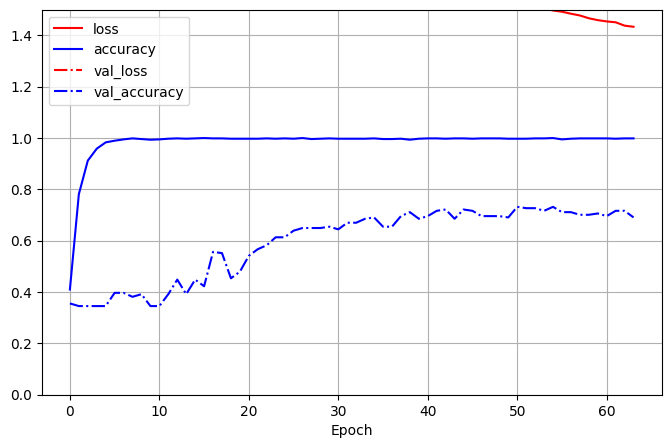

In [324]:
infos(model, history)